In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import nltk
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data= pd.read_csv('amazon_alexa.csv')
data.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [4]:
data.shape

(3150, 5)

# Following online tutorial to create a word cloud - source: https://www.datacamp.com/community/tutorials/wordcloud-python

In [5]:
text = " ".join(review for review in data.verified_reviews)
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 419105 words in the combination of all reviews.


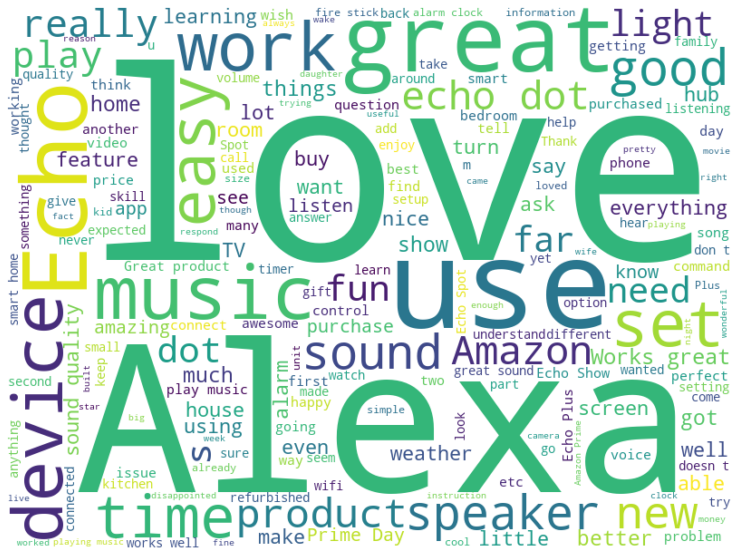

In [7]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["everyone", "sometimes", "verified_reviews", "dtype", "object", "thing", "now", "one", "item", "bought", "will", "still", "without"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, width = 800, height = 600, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (15, 10), facecolor = 'None')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

I PROPOSE TO USE THE CLOUD FROM THE ONLINE TUTORIAL.


# Discovering the most rated Alexa variations and its average rating

In [10]:
data[["variation", "verified_reviews","rating"]].head()

,variation,verified_reviews,rating
0,Charcoal Fabric,Love my Echo!,5
1,Charcoal Fabric,Loved it!,5
2,Walnut Finish,"Sometimes while playing a game, you can answer...",4
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,5
4,Charcoal Fabric,Music,5


In [15]:
#Let's find out the review count and average rating by Variation
 #First,Groupby by variation
variation = data.groupby("variation")

 #Then, let's get the Summary statistic of all countries
variation.describe().head(16)

rating                                          \
                              count      mean       std  min  25%  50%  75%   
variation                                                                     
Black                         261.0  4.233716  1.339838  1.0  4.0  5.0  5.0   
Black  Dot                    516.0  4.453488  1.027660  1.0  4.0  5.0  5.0   
Black  Plus                   270.0  4.370370  1.158391  1.0  4.0  5.0  5.0   
Black  Show                   265.0  4.490566  0.996635  1.0  4.0  5.0  5.0   
Black  Spot                   241.0  4.311203  1.247764  1.0  4.0  5.0  5.0   
Charcoal Fabric               430.0  4.730233  0.683994  1.0  5.0  5.0  5.0   
Configuration: Fire TV Stick  350.0  4.591429  0.990751  1.0  5.0  5.0  5.0   
Heather Gray Fabric           157.0  4.694268  0.647108  2.0  5.0  5.0  5.0   
Oak Finish                     14.0  4.857143  0.363137  4.0  5.0  5.0  5.0   
Sandstone Fabric               90.0  4.355556  0.997875  1.0  4.0  5.0  5.0   
Walnut Finish                   9.0  4.888889  0.333333  4.0  5.0  5.0  5.0   
White                          91.0  4.142857  1.464934  1.0  4.0  5.0  5.0   
White  Dot                    184.0  4.423913  1.047857  1.0  4.0  5.0  5.0   
White  Plus                    78.0  4.358974  1.184032  1.0  4.0  5.0  5.0   
White  Show                    85.0  4.282353  1.278129  1.0  4.0  5.0  5.0   
White  Spot                   109.0  4.311927  1.222454  1.0  4.0  5.0  5.0   

                                  feedback                                     \
                              max    count      mean       std  min  25%  50%   
variation                                                                       
Black                         5.0    261.0  0.865900  0.341414  0.0  1.0  1.0   
Black  Dot                    5.0    516.0  0.930233  0.255002  0.0  1.0  1.0   
Black  Plus                   5.0    270.0  0.896296  0.305442  0.0  1.0  1.0   
Black  Show                   5.0    265.0  0.932075  0.252092  0.0  1.0  1.0   
Black  Spot                   5.0    241.0  0.867220  0.340043  0.0  1.0  1.0   
Charcoal Fabric               5.0    430.0  0.972093  0.164898  0.0  1.0  1.0   
Configuration: Fire TV Stick  5.0    350.0  0.920000  0.271682  0.0  1.0  1.0   
Heather Gray Fabric           5.0    157.0  0.987261  0.112504  0.0  1.0  1.0   
Oak Finish                    5.0     14.0  1.000000  0.000000  1.0  1.0  1.0   
Sandstone Fabric              5.0     90.0  0.933333  0.250841  0.0  1.0  1.0   
Walnut Finish                 5.0      9.0  1.000000  0.000000  1.0  1.0  1.0   
White                         5.0     91.0  0.813187  0.391921  0.0  1.0  1.0   
White  Dot                    5.0    184.0  0.934783  0.247583  0.0  1.0  1.0   
White  Plus                   5.0     78.0  0.897436  0.305352  0.0  1.0  1.0   
White  Show                   5.0     85.0  0.870588  0.337647  0.0  1.0  1.0   
White  Spot                   5.0    109.0  0.889908  0.314450  0.0  1.0  1.0   

                                        
                              75%  max  
variation                               
Black                         1.0  1.0  
Black  Dot                    1.0  1.0  
Black  Plus                   1.0  1.0  
Black  Show                   1.0  1.0  
Black  Spot                   1.0  1.0  
Charcoal Fabric               1.0  1.0  
Configuration: Fire TV Stick  1.0  1.0  
Heather Gray Fabric           1.0  1.0  
Oak Finish                    1.0  1.0  
Sandstone Fabric              1.0  1.0  
Walnut Finish                 1.0  1.0  
White                         1.0  1.0  
White  Dot                    1.0  1.0  
White  Plus                   1.0  1.0  
White  Show                   1.0  1.0  
White  Spot                   1.0  1.0

Rating's Count is the number of rating/reviews that each variation received

Rating's mean is the average rating that each variation received

# Ploting the most rated Alexa Variations

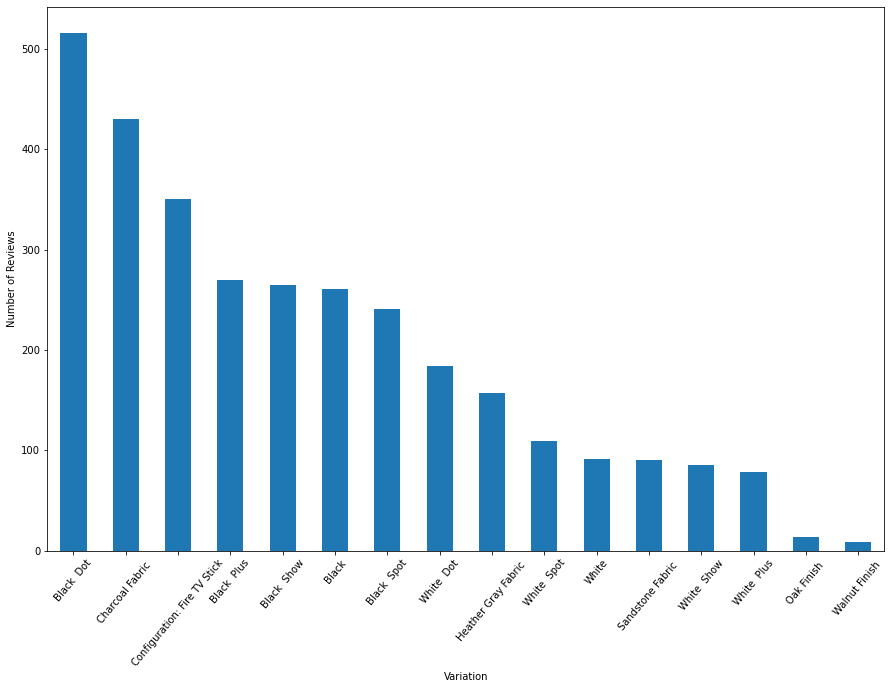

In [21]:
plt.figure(figsize=(15,10))
variation.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Variation")
plt.ylabel("Number of Reviews")
plt.show()

Note to team: The most suitable visualization for review counts is the bar chart, so we will not show this pie chart

# Discovering the top rated variations

In [25]:
#This sorts the variations in descending order of ratings (#We can also find out the top five rated Alexa's variations)
variation.mean().sort_values(by="rating",ascending=False).head(16)

,rating,feedback
variation,,
Walnut Finish,4.888889,1.000000
Oak Finish,4.857143,1.000000
Charcoal Fabric,4.730233,0.972093
Heather Gray Fabric,4.694268,0.987261
Configuration: Fire TV Stick,4.591429,0.920000
Black Show,4.490566,0.932075
Black Dot,4.453488,0.930233
White Dot,4.423913,0.934783
Black Plus,4.370370,0.896296


<Figure size 1080x720 with 0 Axes>

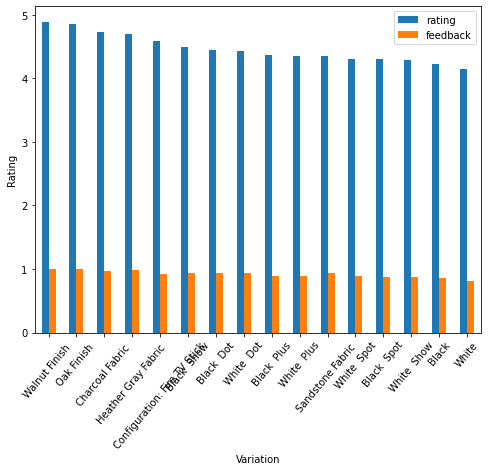

In [26]:
plt.figure(figsize=(15,10))
variation.mean().sort_values(by="rating",ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Variation")
plt.ylabel("Rating")
plt.show()

# Plotting Count of reviews versus ratings

<AxesSubplot:xlabel='variation'>

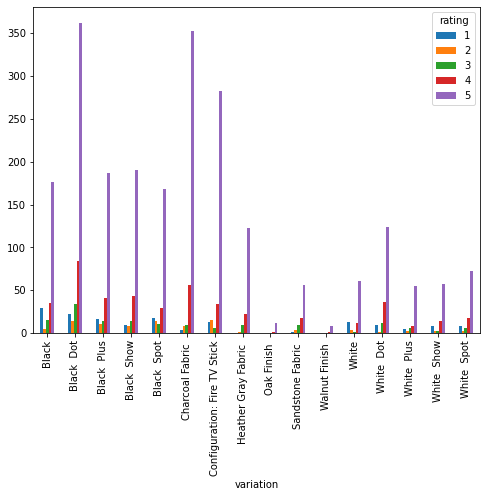

In [45]:
rating = data.groupby(['variation', 'rating']).rating.count().unstack()  
rating.plot(kind='bar') 

We can see that although Walnut Finish and Oak Finish had the top ratings, the number of reviews they have are so low that the ratings become not significant enough 

TODAY I GOT THIS DONE:

1)PLOTTING VARIATION FREQUECY PYE/BAR CHARTS - TO FIND OUT MOST REVIEWED ECHO MODEL

2)CALCULATING AVERAGE RATING FOR EACH VARIATION - CREATE BAR CHART

NEXT IS:
    
FREQUENCY, FREQUENCY PLOT

TOKENIZATION/ CONCORDANCE/ SENTIMENT ANALYSIS

CREATING MODELS WITH DIFFERENT MODELS AND FINDING ACCURACY